# Determining a promising tariff for a telecom company
## Customer

*Commercial department of the federal cellular operator Megaline.

## Objective of the project

*Preliminary analysis of the behavior of customers using the Smart and Ultra tariff plans.

*It is necessary to determine which tariff is more profitable from the company’s point of view. The information will be taken into account when adjusting the advertising budget. To answer this question, two hypotheses will be tested:

*the average revenue of users of Ultra and Smart tariffs differs;
*The average revenue of users from Moscow differs from the revenue of users from other regions.
## Input data

*Data from 500 Megaline users: who they are, where they are from, what tariff they use, how many calls and messages each person sent in 2018. Files users, tariffs, calls, internet and messages.

## Description of tariffs

*Tariff "Smart"

Monthly fee: 550 rubles
Includes 500 minutes of talk time, 50 messages and 15 GB of Internet traffic
Cost of services above the tariff package:
minute of conversation: 3 rubles
message: 3 rubles
1 GB of Internet traffic: 200 rubles

*Tariff "Ultra"

Monthly fee: 1950 rubles
Includes 3000 minutes of talk time, 1000 messages and 30 GB of Internet traffic
Cost of services above the tariff package:
minute of conversation: 1 ruble
message: 1 ruble
1 GB of Internet traffic: 150 rubles
Note:

*Megaline always rounds seconds to minutes, and megabytes to gigabytes. Each call is rounded up separately: even if it lasted only 1 second, it will be counted as 1 minute. For web traffic, individual sessions are not counted. Instead, the monthly total is rounded up. If a subscriber uses 1025 megabytes this month, they will be charged for 2 gigabytes.

## Progress of the study

*The research will take place in five stages:

*Review of data;
*Data preprocessing;
*Calculations;
*Data analysis;
*Testing hypotheses.

# Data overview

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

calls = pd.read_csv('calls.csv')

In [2]:
print(calls.head())

       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000


In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


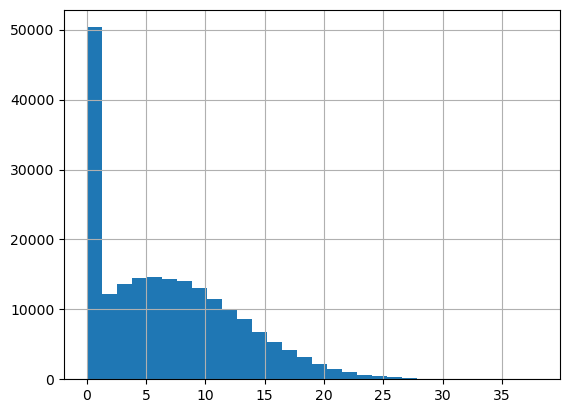

In [4]:
calls['duration'].hist(bins=30);

## Cast columns to appropriate data types

In [5]:
sessions = pd.read_csv('internet.csv')

In [6]:
print(sessions.head())

   Unnamed: 0      id  mb_used session_date  user_id
0           0  1000_0   112.95   2018-11-25     1000
1           1  1000_1  1052.81   2018-09-07     1000
2           2  1000_2  1197.26   2018-06-25     1000
3           3  1000_3   550.27   2018-08-22     1000
4           4  1000_4   302.56   2018-09-24     1000


In [7]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


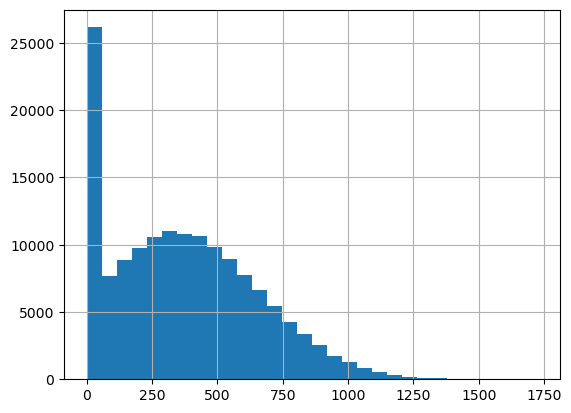

In [8]:
sessions['mb_used'].hist(bins=30);

In [9]:
messages = pd.read_csv('messages.csv')

In [10]:
print(messages.head())

       id message_date  user_id
0  1000_0   2018-06-27     1000
1  1000_1   2018-10-08     1000
2  1000_2   2018-08-04     1000
3  1000_3   2018-06-16     1000
4  1000_4   2018-12-05     1000


In [11]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [12]:
tariffs = pd.read_csv('tariffs.csv')

In [13]:
print(tariffs)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute tariff_name  
0              550         200                3               3       smart  
1             1950         150                1               1       ultra  


In [14]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [15]:
users = pd.read_csv('users.csv')

In [16]:
print(users.head())

   user_id  age churn_date         city first_name  last_name    reg_date  \
0     1000   52        NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
1     1001   41        NaN       Москва       Иван       Ежов  2018-11-01   
2     1002   59        NaN  Стерлитамак    Евгений  Абрамович  2018-06-17   
3     1003   23        NaN       Москва      Белла   Белякова  2018-08-17   
4     1004   68        NaN  Новокузнецк    Татьяна   Авдеенко  2018-05-14   

  tariff  
0  ultra  
1  smart  
2  smart  
3  ultra  
4  ultra  


In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [18]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

calls['call_date'] = pd.to_datetime(calls['call_date'])

messages['message_date'] = pd.to_datetime(messages['message_date'])
sessions['session_date'] = pd.to_datetime(sessions['session_date'])

In the data we find calls with zero duration. This is not an error: zeros indicate missed calls.

According to the Note, the Operator rounds each call up to the nearest minute.

In [19]:


calls['duration'] = np.ceil(calls['duration'])
calls['duration'] = calls['duration'].astype('int')    

In [20]:
sessions.drop(columns='Unnamed: 0', inplace=True)

In [21]:
calls['month'] = calls['call_date'].dt.month

In [22]:
messages['month'] = messages['message_date'].dt.month

In [23]:
sessions['month'] = sessions['session_date'].dt.month

In [24]:
calls_per_month = calls.groupby(['user_id', 'month']).agg(calls=('duration', 'count'))

In [25]:
print(calls_per_month.head(30))

               calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63
1002    6         15
        7         26
        8         42
        9         36
        10        33
        11        32
        12        33
1003    8         55
        9        134
        10       108
        11       115
        12       108
1004    5          9
        6         31
        7         22
        8         19
        9         26
        10        29
        11        19
        12        21


In [26]:
minutes_per_month = calls.groupby(['user_id', 'month']).agg(minutes=('duration', 'sum'))

In [27]:
print(minutes_per_month.head(30))

               minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
        10         350
        11         338
        12         333
1001    11         430
        12         414
1002    6          117
        7          214
        8          289
        9          206
        10         212
        11         243
        12         236
1003    8          380
        9          961
        10         855
        11         824
        12         802
1004    5           35
        6          171
        7          135
        8          137
        9          117
        10         145
        11         117
        12         130


We will also create another summary table in a separate frame - by the number of SMS messages.

In [28]:
messages_per_month = messages.groupby(['user_id', 'month']).agg(messages=('message_date', 'count'))

In [29]:
print(messages_per_month.head(30))

               messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11
        8            13
        9             4
        10           10
        11           16
        12           12
1003    8            37
        9            91
        10           83
        11           94
        12           75
1004    5            95
        6           134
        7           181
        8           151
        9           146
        10          165
        11          158
        12          162
1005    1             7
        2            38


We will also create another summary table in a separate frame - by the number of user sessions.

In [30]:
sessions_per_month = sessions.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})

In [31]:
print(sessions_per_month.head(30))

                mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66
1002    6      10856.82
        7      17580.10
        8      20319.26
        9      16691.08
        10     13888.25
        11     18587.28
        12     18113.73
1003    8       8565.21
        9      12468.87
        10     14768.14
        11     11356.89
        12     10121.53
1004    5      13403.98
        6      17600.02
        7      22229.58
        8      28584.37
        9      15109.03
        10     18475.44
        11     15616.02
        12     18021.04


# Data analysis and revenue calculation

In [32]:
users['churn_date'].count() / users['churn_date'].shape[0] * 100

7.6

7.6% of clients from the dataset terminated their contracts

Check and fill missing values

In [33]:
user_behavior = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')\

user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [34]:
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

replace missing or undefined values with zero

In [35]:
user_behavior['calls'] = user_behavior['calls'].fillna(0)
user_behavior['minutes'] = user_behavior['minutes'].fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used'] = user_behavior['mb_used'].fillna(0)

In [36]:
tariffs = tariffs.rename(
    columns={
        'tariff_name': 'tariff'
    }
)

In [37]:
user_behavior = user_behavior.merge(tariffs, on='tariff')

In [38]:
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

In [39]:
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

In [40]:
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

In [41]:
user_behavior['total_cost'] = \
      user_behavior['rub_monthly_fee']\
    + user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']

In [42]:
stats_df = user_behavior.pivot_table(
            index=['month', 'tariff'],\
            values=['calls', 'minutes', 'messages', 'mb_used'],\
            aggfunc=['mean', 'std', 'median']\
).round(2).reset_index()

stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std', 
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

stats_df.head(10)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8513.72,18.24,203.85,20.81,6444.68,16.20,154.23,20.5,7096.18,15.0,162.5
1,1,ultra,59.44,13140.68,33.78,428.11,41.64,6865.35,30.67,269.76,51.0,14791.37,32.0,382.0
2,2,smart,40.19,11597.05,24.09,298.69,25.39,6247.35,21.75,190.82,38.5,12553.71,20.0,258.0
3,2,ultra,41.54,11775.94,21.96,297.12,40.97,10644.64,26.77,296.51,25.0,7327.12,5.5,168.0
4,3,smart,54.32,15104.16,31.86,390.05,25.54,5828.24,26.80,191.89,59.0,15670.25,23.0,409.0
5,3,ultra,67.68,17535.55,32.30,489.65,44.84,10951.79,41.62,333.74,57.0,17495.18,20.0,403.0
6,4,smart,51.31,13462.18,30.74,367.13,25.70,5698.25,24.54,186.49,52.0,14087.65,28.0,368.5
7,4,ultra,64.09,16828.13,31.56,458.02,36.27,9718.65,37.51,267.68,61.0,16645.78,17.0,453.0
8,5,smart,55.24,15805.18,33.77,387.36,25.38,5978.23,27.04,186.60,59.0,16323.94,30.0,433.0
9,5,ultra,72.51,19363.15,37.85,510.33,41.08,10046.11,40.31,289.60,75.0,18696.43,25.0,519.0


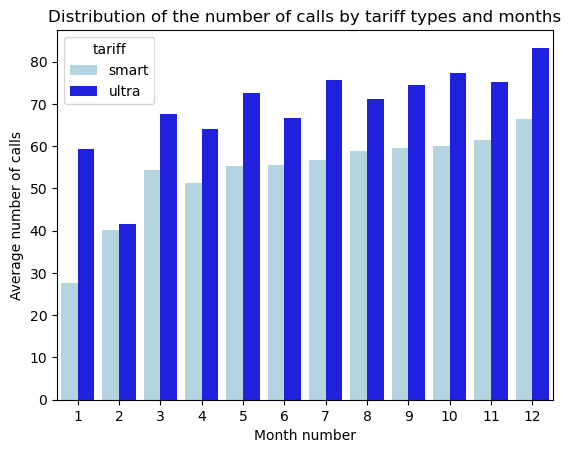

In [43]:


ax = sns.barplot(x='month',
            y='calls_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Distribution of the number of calls by tariff types and months')
ax.set(xlabel='Month number', ylabel='Average number of calls');

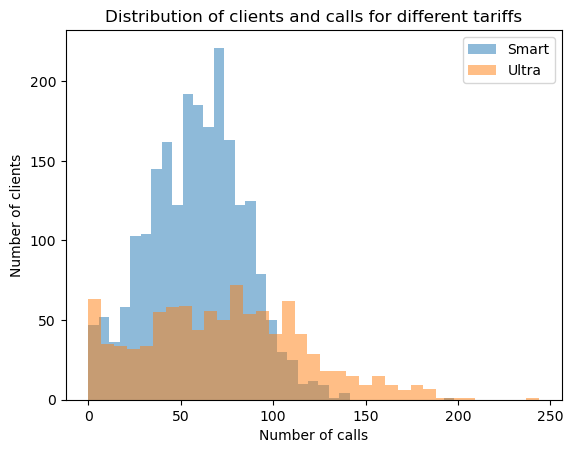

In [44]:


user_behavior.groupby('tariff')['calls'].plot(kind='hist', bins=35, alpha=0.5)
plt.legend(['Smart', 'Ultra'])
plt.title('Distribution of clients and calls for different tariffs')
plt.xlabel('Number of calls')
plt.ylabel('Number of clients')
plt.show()

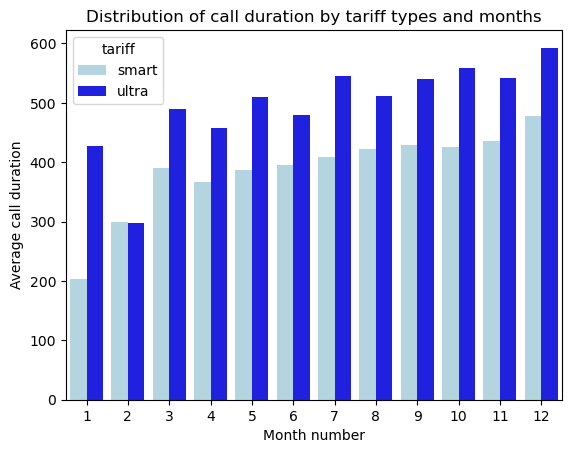

In [45]:
ax = sns.barplot(x='month',
            y='minutes_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Distribution of call duration by tariff types and months')
ax.set(xlabel='Month number', ylabel='Average call duration');

In [46]:
user_behavior[user_behavior['tariff'] =='smart']['minutes'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['minutes'].hist(bins=35, alpha=0.5, color='blue');
plt.legend(['Smart', 'Ultra'])


SyntaxError: EOL while scanning string literal (2014602545.py, line 5)

The average call duration for Ultra tariff subscribers is longer than for Smart tariff subscribers. Over the course of the year, users of both tariffs increase the average duration of their calls. The growth in the average duration of calls among subscribers of the Smart tariff is uniform throughout the year. Ultra plan users do not exhibit such linear stability. It is worth noting that in February, subscribers of both tariff plans had the lowest rates.

In [ ]:
ax = sns.barplot(x='month',
            y='messages_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Distribution of the number of messages by tariff types and months')
ax.set(xlabel='Month number', ylabel='Average number of messages');

In [ ]:
user_behavior[user_behavior['tariff'] =='smart']['messages'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['messages'].hist(bins=35, alpha=0.5, color='blue');
plt.legend(['Smart', 'Ultra'])


On average, Ultra plan users send more messages—almost 20 more messages—than Smart plan users. The number of messages on both tariffs is growing throughout the year. The dynamics of sending messages are similar to the trends in the duration of calls: in February, the smallest number of messages for the year was noted and users of the Ultra tariff also show non-linear positive dynamics.

In [ ]:
ax = sns.barplot(x='month',
            y='sessions_mean',
            hue='tariff',
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Distribution of the amount of traffic spent (MB) by tariff type and month')
ax.set(xlabel='Month number', ylabel='Average number of megabytes');

In [ ]:
user_behavior[user_behavior['tariff'] =='smart']['mb_used'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['mb_used'].hist(bins=35, alpha=0.5, color='blue');
plt.legend(['Smart', 'Ultra'])


Users used the Internet the least in January, February and April. Most often, Smart tariff subscribers spend 15–17 GB, and Ultra tariff subscribers spend 19–21 GB.

## Hypothesis testing: the average revenue of users of Ultra and Smart tariffs differs;

* H_0: Revenue (total_cost) of "Ultra" users = revenue (total_cost) of "Smart" users 
* H_a: Revenue (total_cost) of "Ultra" users ≠ revenue (total_cost) of "Smart" users 
alpha = 0.05

In [ ]:
from scipy import stats as st

In [ ]:
ultra_cost = user_behavior[user_behavior['tariff'] == 'smart']['total_cost']
smart_cost = user_behavior[user_behavior['tariff'] == 'ultra']['total_cost']

results = st.ttest_ind(ultra_cost, smart_cost, equal_var = False)

alpha = 0.05

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

Profit from users of smart and ultra stat tariffs differs significantly

## Hypothesis testing: average revenue from users from Moscow differs from revenue from users in other regions;

* H_0: Revenue (total_cost) of users from Moscow = revenue (total_cost) of users not from Moscow
* H_1: Revenue (total_cost) of users from Moscow ≠ revenue (total_cost) of users not from Moscow
alpha = 0.05

In [ ]:
ultra_cost = user_behavior[user_behavior['city'] =='Москва']['total_cost']
smart_cost = user_behavior[user_behavior['city'] != 'Москва']['total_cost']

results = st.ttest_ind(ultra_cost, smart_cost, equal_var = False)

alpha = 0.05

print('p-значение:', results.pvalue)
if results.pvalue > alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-value turned out to be greater than the selected level 𝛼=0.05. It was not possible to reject the null hypothesis; the average revenue of users from Moscow and the regions is the same.

# Conclusion
The research или analysis was conducted on a sample of five hundred users of Ultra and Smart tariffs in both Moscow and other cities.

At the same time, there were fewer users from Moscow, and “Smart” prevailed among the tariffs chosen by users.

It was found that, on average, tariff users fit within the limits. But in special cases, there is a need to use additional paid services; for Ultra, overpayments amount to 50-100 rubles per month, while some users of the Smart tariff can spend 2-3 equivalents of a subscription fee per month.

During the analysis, it was necessary to confirm the following hypotheses:

the average revenue of users of Ultra and Smart tariffs differs;
The average revenue of users from Moscow differs from the revenue of users from other regions.
In the first case, we rejected the null hypothesis about the equality of the average revenue of tariffs and could not refute the hypothesis that the average revenue of the Ultra tariff is greater than the average revenue of the Smart tariff.

In the second case, the null hypothesis about the equality of the average revenue of users from Moscow and users from other cities was not rejected.